c:\users\admin\desktop\realbiz\mlchatbot\venv\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\admin\desktop\realbiz\mlchatbot\venv\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\admin\desktop\realbiz\mlchatbot\venv\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
c:\users\admin\desktop\realb

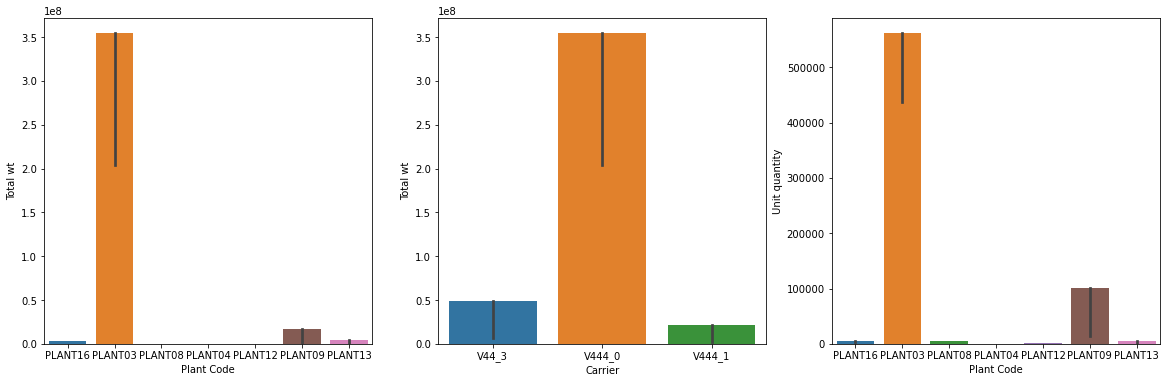

In [1]:
import nltk
import string
import tkinter as tk
from tkinter import filedialog
import numpy as np
import pandas as pd
from PIL import ImageTk, Image
import seaborn as sns
import matplotlib.pyplot as plt


from scipy.stats import chi2_contingency
from scipy.stats import chi2

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


#coli = ["Shipment analysis","Plant and Carrier capacity"]
#coli = ["Churn analysis","General Survey"]
#coli = ["Sales per country","Dealsize analysis","Failed delivery status","Geographical distribution"]
coli = ["HR:-",
        "Churn analysis","General Survey",
        "Sales:-","Sales per country","Dealsize analysis","Failed delivery status","Geographical distribution",
        "Operations:-","Shipment analysis","Plant and Carrier capacity"]

def CheckS():      # on clicking
    
    
    if clickedS.get()=="Dealsize analysis":
        try:
            ex = pd.read_csv(files[-1],encoding='unicode_escape')
        except:
            ex = pd.read_excel(files[-1],sheet_name=0,engine='openpyxl')
        
        
        x = ex[col_detect(ex.columns.to_list(),"dealsize deal size")[0]]
        y = [col_detect(ex.columns.to_list(),"sales income revenue")[0],
         col_detect(ex.columns.to_list(),"quantityordered quantity")[0]]
        
        f, axes = plt.subplots(1, 2,figsize=(20,6))                   #20,6(1,4)      9,6(2,2)
        
        axes = axes.flatten()
    
    
        for i in range(2):
            pl = sns.barplot(  x=x , y=ex[y[i]] , data=ex , ax=axes[i])    
        #pl = sns.barplot(  x=x, y= ex[y[1]], data=ex , ax=axes[1])
        
            
        
        f.savefig("photo/Salesplot2.jpg")
        
        top.logo = ImageTk.PhotoImage(Image.open("photo/Salesplot2.jpg"))
        Canvas1.create_image(0, 0, anchor=tk.NW, image=top.logo)
        
        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        
        table = pd.pivot_table(ex, values=col_detect(ex.columns.to_list(),'sales revenue income')[0], 
                               columns=[col_detect(ex.columns.to_list(),'dealsize deal size')[0]], 
                               aggfunc=np.average)
        table = table.transpose()
        
        Text1.insert(tk.END,"\n\n"+"So you are from the sales department"+'\n\n')
        Text1.insert(tk.END,f"From the {col_detect(ex.columns.to_list(),'dealsize deal size')[0]} graph we conclude that :"+'\n')
        Text1.insert(tk.END,f"1) {table.idxmax()[0]} {col_detect(ex.columns.to_list(),'dealsize deal size')[0]} is good for {col_detect(ex.columns.to_list(),'sales income revenue')[0]}"+'\n')
        Text1.insert(tk.END,f"2) {table.idxmin()[0]} {col_detect(ex.columns.to_list(),'dealsize deal size')[0]} is not good for {col_detect(ex.columns.to_list(),'sales income revenue')[0]}"+'\n\n')

        table = pd.pivot_table(ex, values=col_detect(ex.columns.to_list(),'quantityordered quantity')[0], 
                               columns=[col_detect(ex.columns.to_list(),'dealsize deal size')[0]], 
                               aggfunc=np.average)
    
        
        Text1.insert(tk.END,f"From the {col_detect(ex.columns.to_list(),'quantityordered quantity')[0]} graph we clearly see that:"+'\n')
        
        for i in range(3):
            Text1.insert(tk.END,f"1) {col_detect(ex.columns.to_list(),'quantityordered quantity')[0]} around {int(table.iloc[0,i])} is considered {table.columns[i]}"+'\n')
        
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
        
        
        
        
    if clickedS.get()=="Failed delivery status":
        try:
            ex = pd.read_csv(files[-1],encoding='unicode_escape')
        except:
            ex = pd.read_excel(files[-1],sheet_name=0,engine='openpyxl')
        
        ex = ex[ex["STATUS"]!="Shipped"]
        
        #y = ["TERRITORY","DEALSIZE","COUNTRY"]
        
        y = [col_detect(ex.columns.to_list(),"territory")[0],
             col_detect(ex.columns.to_list(),"dealsize deal")[0],
             col_detect(ex.columns.to_list(),"country")[0]]
        
        
        f, axes = plt.subplots(1, 3,figsize=(20,6))                   #20,6(1,4)      9,6(2,2)
        plt.xticks(rotation=10)
        
        axes = axes.flatten()
    
        for i in range(3):
            data_crosstab = pd.crosstab(ex[y[i]],ex[col_detect(ex.columns.to_list(),"status")[0]], margins = False)
            pl = data_crosstab.plot.bar(stacked=True,ax = axes[i],rot=10)
        
       
        # 1st conclusion 
        data_crosstab = pd.crosstab(ex[y[0]],ex[col_detect(ex.columns.to_list(),"status")[0]], margins = False)
        l = []
        def Sort3(sub_li):
                sub_li.sort(key = lambda x: x[2],reverse = True)
                return sub_li
        for i in range(data_crosstab.shape[0]):
            l.append([data_crosstab.columns[0],data_crosstab.index[i],data_crosstab.iloc[i][0]])
        l = Sort3(l)
            
            
        f.savefig("photo/Salesplot3.jpg")
        
        top.logo = ImageTk.PhotoImage(Image.open("photo/Salesplot3.jpg"))
        Canvas1.create_image(0, 0, anchor=tk.NW, image=top.logo)
        
        
        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        Text1.insert(tk.END,"\n\n"+"So you are from the sales department"+'\n\n')
        Text1.insert(tk.END,f"From the {col_detect(ex.columns.to_list(),'territory')[0]} graph we conclude that :"+'\n')
            
        Text1.insert(tk.END,f"1) Most shipments are {l[0][0]} in the {l[0][1]} {col_detect(ex.columns.to_list(),'territory')[0]}"+'\n')
        Text1.insert(tk.END,f"2) Less shipments are {l[1][0]} in the {l[1][1]} {col_detect(ex.columns.to_list(),'territory')[0]}"+'\n')
        Text1.insert(tk.END,f"3) Least shipments are {l[-1][0]} in the {l[-1][1]} {col_detect(ex.columns.to_list(),'territory')[0]}"+'\n')
        
        Text1.insert(tk.END,'\n\n')
        
        # 2nd conclusion
        
        data_crosstab = pd.crosstab(ex[y[1]],ex[col_detect(ex.columns.to_list(),"status")[0]], margins = False)
        l = []
        def Sort3(sub_li):
                sub_li.sort(key = lambda x: x[2],reverse = True)
                return sub_li
        for i in range(data_crosstab.shape[0]):
            l.append([data_crosstab.columns[0],data_crosstab.index[i],data_crosstab.iloc[i][0]])
        l = Sort3(l)
        
        Text1.insert(tk.END,f"From the {col_detect(ex.columns.to_list(),'dealsize deal')[0]} graph we conclude that :"+'\n')
        Text1.insert(tk.END,f"1) {l[-1][1]} {col_detect(ex.columns.to_list(),'dealsize deal')[0]} should be promoted as no deals are {l[0][0]}"+'\n')
        Text1.insert(tk.END,f"2) {l[0][1]} {col_detect(ex.columns.to_list(),'dealsize deal')[0]} should NOT be promoted as most deals are {l[-1][0]}"+'\n\n')
        
        
        # 3rd conclusion
        data_crosstab = pd.crosstab(ex[y[2]],ex[col_detect(ex.columns.to_list(),"status")[0]], margins = False)
        l = []
        def Sort3(sub_li):
                sub_li.sort(key = lambda x: x[2],reverse = True)
                return sub_li
        for i in range(data_crosstab.shape[0]):
            l.append([data_crosstab.columns[0],data_crosstab.index[i],data_crosstab.iloc[i][0]])
        l = Sort3(l)
        
        Text1.insert(tk.END,f"From the {col_detect(ex.columns.to_list(),'country')[0]} graph we clearly see that:"+'\n')
        Text1.insert(tk.END,f"1) In {l[0][1]} most deals are Cancelled"+'\n')
        Text1.insert(tk.END,f"2) Cancelled deals are least in {l[-1][1]}"+'\n')
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
        
    if clickedS.get()=="Geographical distribution":
        try:
            ex = pd.read_csv(files[-1],encoding='unicode_escape')
        except:
            ex = pd.read_excel(files[-1],sheet_name=0,engine='openpyxl')
        
        x = ex[col_detect(ex.columns.to_list(),'sales income revenue')[0]]
        
        f, axes = plt.subplots(1, 2,figsize=(20,6))                   #20,6(1,4)      9,6(2,2)
        
        plt.legend(loc="upper right")
        axes = axes.flatten()
        
    
            
        pl = sns.barplot(  y= x, x= ex[col_detect(ex.columns.to_list(),'territory')[0]], data=ex , ax=axes[0])    
        
        data_crosstab = pd.crosstab(ex[col_detect(ex.columns.to_list(),'territory')[0]],ex[col_detect(ex.columns.to_list(),'country')[0]], margins = False)
        pl = data_crosstab.plot.bar(stacked=True,ax=axes[1],rot=0)
        
            
        
        f.savefig("photo/Salesplot3.jpg")
        
        top.logo = ImageTk.PhotoImage(Image.open("photo/Salesplot3.jpg"))
        Canvas1.create_image(0, 0, anchor=tk.NW, image=top.logo)
        
        # 1st conclusion
        l = []
        
        def Sort3(sub_li):
                sub_li.sort(key = lambda x: x[2],reverse = True)
                return sub_li
        for i in range(data_crosstab.shape[0]):
            l.append([data_crosstab.columns[0],data_crosstab.index[i],data_crosstab.iloc[i][0]])
        l = Sort3(l)
        
        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        Text1.insert(tk.END,"\n\n"+"So you are from the sales department"+'\n\n')
        Text1.insert(tk.END,f"From the {col_detect(ex.columns.to_list(),'territory')[0]} graph we conclude that :"+'\n')
        Text1.insert(tk.END,f"1) Sales are highest in {l[-1][1]} {col_detect(ex.columns.to_list(),'territory')[0]}"+'\n')
        Text1.insert(tk.END,f"2) Sales are lowest in {l[0][1]} {col_detect(ex.columns.to_list(),'territory')[0]}"+'\n\n')

        
        # 2nd conclusion
        data_crosstab = pd.crosstab(ex[col_detect(ex.columns.to_list(),"territory")[0]],ex[col_detect(ex.columns.to_list(),"country")[0]], margins = False)
        l = []
        def Sort3(sub_li):
                sub_li.sort(key = lambda x: x[2],reverse = True)
                return sub_li
        for i in range(data_crosstab.shape[0]):
            l.append([data_crosstab.columns[0],data_crosstab.index[i],data_crosstab.iloc[i][0]])
        l = Sort3(l)
        
        data_crosstab_t = data_crosstab.transpose()
        #data_crosstab_t["EMEA"].idxmax()
        
        Text1.insert(tk.END,f"From the {col_detect(ex.columns.to_list(),'country')[0]} graph we clearly see that:"+'\n')
        Text1.insert(tk.END,f"1) {data_crosstab_t[l[0][1]].idxmax()} contributes most in {l[0][1]} {col_detect(ex.columns.to_list(),'territory')[0]}"+'\n')
        Text1.insert(tk.END,f"2) {data_crosstab_t[l[1][1]].idxmax()} contributes most in {l[1][1]} {col_detect(ex.columns.to_list(),'territory')[0]}"+'\n')
        Text1.insert(tk.END,f"3) {data_crosstab_t[l[2][1]].idxmax()} contributes most in {l[2][1]} {col_detect(ex.columns.to_list(),'territory')[0]}"+'\n')
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)    
    
    
    if clickedS.get()=="General Survey":
        
        try:
            ex = pd.read_csv(files[-1],encoding='unicode_escape')
        except:
            ex = pd.read_excel(files[-1],sheet_name=0,engine='openpyxl')
            
            
        x = ex[col_detect(ex.columns.to_list(),"seniorcitizen senior citizen old people")[0]]
        #y = ["InternetService","PaymentMethod","TechSupport"]
        y = [col_detect(ex.columns.to_list(),"InternetService Internet")[0],
             col_detect(ex.columns.to_list(),"PaymentMethod Payment")[0],
             col_detect(ex.columns.to_list(),"TechSupport Technology")[0]]
        
        
        
        f, axes = plt.subplots(1, 3,figsize=(20,6))                   #20,6(1,4)      9,6(2,2)

        
        axes = axes.flatten()
    
        con = []
        for i in range(3):
                data_crosstab = pd.crosstab(ex[y[i]],x, margins = False)
                pl = data_crosstab.plot.bar(stacked=True, ax=axes[i],rot=8)
            
                d = data_crosstab.transpose()
                c = []
                for j in d.columns.to_list():
                    c.append([j,d[j][0]+d[j][1]])
                def Sort(sub_li):
                        sub_li.sort(key = lambda x: x[1],reverse = True)
                        return sub_li
                con.append(Sort(c)[0][0])  ## append
            #data_crosstab = pd.crosstab(ex[y[i]],x, margins = False)
            #pl = data_crosstab.plot.bar(stacked=True, ax=axes[i],rot=0)
            #if str(ex[y[i]].dtype) == "float64" and ex[y[i]].value_counts().shape[0]>4:
            #    pl = sns.lineplot(  y=y[i], x= x, data=ex , ax=axes[i])
            #else:    
            #    pl = sns.barplot(  y=y[i], x= x, data=ex , ax=axes[i])
            
            
        f.savefig("photo/HrplotG.jpg")
        
        top.logo = ImageTk.PhotoImage(Image.open("photo/HrplotG.jpg"))
        Canvas1.create_image(0, 0, anchor=tk.NW, image=top.logo)
        
        
    
        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        Text1.insert(tk.END,"From this we conclude that :"+'\n\n')
        for i in range(2):
            Text1.insert(tk.END,f"{i+1}) {con[i]} is popular among citizens irrespective of their ages"+'\n')
        Text1.insert(tk.END,"3) Almost everyone prefers having an internet service"+'\n')
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
        
        
    if clickedS.get()=="Plant and Carrier capacity":
        try:
            ex = pd.read_csv(files[-1],encoding='unicode_escape')
        except:
            ex = pd.read_excel(files[-1],sheet_name=0,engine='openpyxl')
    
    
        f, axes = plt.subplots(1, 3,figsize=(20,6))                  #20,6(1,4)      9,6(2,2)
        plt.xticks(rotation=0)

        axes = axes.flatten()

        #col_detect(ex.columns.to_list(),'Unit quantity')[0]
        pl = sns.barplot(data=ex, x=col_detect(ex.columns.to_list(),"Plant Code")[0],
                         estimator=max,
                         y=col_detect(ex.columns.to_list(),'Total wt')[0],ax = axes[0])
        #ax.set_ylabel("Total Weight")
        pl = sns.barplot(data=ex, x=col_detect(ex.columns.to_list(),'Carrier')[0],
                         estimator=max,
                         y=col_detect(ex.columns.to_list(),'Total wt')[0],ax = axes[1])
        
        pl = sns.barplot(data=ex, x=col_detect(ex.columns.to_list(),"plant code")[0],
                         estimator=max,
                         y=col_detect(ex.columns.to_list(),'Unit quantity')[0],ax = axes[2])



        #for i in range(2):

         #   pl = sns.barplot(  y=y, x= x[i], data=ex , ax=axes[i])


        f.savefig("photo/OPplot1.jpg")

        top.logo = ImageTk.PhotoImage(Image.open("photo/OPplot1.jpg"))
        Canvas1.create_image(0, 0, anchor=tk.NW, image=top.logo)    

        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        Text1.insert(tk.END,"\n\n"+"So you are from the Operations department"+'\n\n')
        
        # getting minimum and maximum values
        table = pd.pivot_table(ex, values=col_detect(ex.columns.to_list(),'total wt weight')[0], 
                               columns=[col_detect(ex.columns.to_list(),'plant code')[0]], 
                               aggfunc=np.sum)
        table = table.transpose()

        #table.idxmin()[0]
        
        
        Text1.insert(tk.END,f"From the {col_detect(ex.columns.to_list(),'plant code')[0]} graph we conclude that :"+'\n')
        Text1.insert(tk.END,f"1) {table.idxmax()[0]} handles the most {col_detect(ex.columns.to_list(),'total wt weight')[0]} for processing"+'\n')
        Text1.insert(tk.END,f"2) {table.idxmin()[0]} handles the least {col_detect(ex.columns.to_list(),'total wt weight')[0]} for processing"+'\n\n')
        
        # getting minimum and maximum values
        table = pd.pivot_table(ex, values=col_detect(ex.columns.to_list(),'total wt weight')[0], 
                               columns=[col_detect(ex.columns.to_list(),'carrier ship')[0]], 
                               aggfunc=np.sum)
        table = table.transpose()

        #table.idxmin()[0]

        Text1.insert(tk.END,f"From the {col_detect(ex.columns.to_list(),'carrier ship')[0]} graph we conclude that :"+'\n')
        Text1.insert(tk.END,f"1) {table.idxmax()[0]} carries the most {col_detect(ex.columns.to_list(),'total wt weight')[0]}"+'\n')
        Text1.insert(tk.END,f"2) {table.idxmin()[0]} carries the least {col_detect(ex.columns.to_list(),'total wt weight')[0]}"+'\n\n')
        
        # getting minimum and maximum values
        table = pd.pivot_table(ex, values=col_detect(ex.columns.to_list(),'unit quantity')[0], 
                               columns=[col_detect(ex.columns.to_list(),'plant code')[0]], 
                               aggfunc=np.sum)
        table = table.transpose()

        #table.idxmin()[0]
        
        Text1.insert(tk.END,f"From the {col_detect(ex.columns.to_list(),'unit quantity')[0]} we clearly see that:"+'\n')
        Text1.insert(tk.END,f"1) {table.idxmax()[0]} plant handles the most {col_detect(ex.columns.to_list(),'unit quantity')[0]}"+'\n')
        Text1.insert(tk.END,f"2) {table.idxmin()[0]} plant handles the least {col_detect(ex.columns.to_list(),'unit quantity')[0]}"+'\n')
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)

        
def finance_analysis():      # first page
    try:
        ex = pd.read_csv(files[-1],encoding='unicode_escape')
    except:
        ex = pd.read_excel(files[-1],sheet_name=0,engine='openpyxl')
    
    #y = ex["SALES"]
    #x = ["YEAR_ID","COUNTRY"]
    
    
    
    f, axes = plt.subplots(1, 2,figsize=(20,6))                  #20,6(1,4)      9,6(2,2)
    plt.xticks(rotation=30)
    
    axes = axes.flatten()
    
    #ex['Date'] = pd.to_datetime(ex['Date'], errors='coerce')
    #ex["Month"] = ex['Date'].dt.month
    if col_detect(ex.columns.to_list(),"month")[0]=="Month":
        plt.xticks(rotation=30)
        sns.barplot(x = col_detect(ex.columns.to_list(),"month")[0], 
                    y = col_detect(ex.columns.to_list(),"amount")[0], ci = None, data = ex, ax=axes[0])
        
    else:
        ex[col_detect(ex.columns.to_list(),"date")[0]] = pd.to_datetime(ex[col_detect(ex.columns.to_list(),"date")[0]], errors='coerce')
        ex["Month"] = ex[col_detect(ex.columns.to_list(),"date")[0]].dt.month
        plt.xticks(rotation=30)
        sns.barplot(x = "Month", 
                    y = "Amount", ci = None, data = ex, ax=axes[0])
    
    plt.xticks(rotation=10)
    sns.barplot( y="Amount", x= col_detect(ex.columns.to_list(),"entity department")[0], data=ex, ci= None)
    
    
    
    
    #for i in range(2):
    #    pl = sns.barplot(  y=y, x= x[i], data=ex , ax=axes[i])
        
        
    f.savefig("photo/financeplot1.jpg")
        
    top.logo = ImageTk.PhotoImage(Image.open("photo/financeplot1.jpg"))
    Canvas1.create_image(0, 0, anchor=tk.NW, image=top.logo)    
        
    Text1.configure(state=tk.NORMAL)             
    Text1.delete("0.0",tk.END) 
    Text1.insert(tk.END,"\n\n"+"So you are from the finance department"+'\n\n')                    
    Text1.insert(tk.END,f"From the {col_detect(ex.columns.to_list(),'year_id year')[0]} graph we conclude that :"+'\n')
    Text1.insert(tk.END,f"1) Amount is minimum in the {col_detect(ex.columns.to_list(),'year_id year')[0]} {ex[col_detect(ex.columns.to_list(),'year_id year')[0]].value_counts().idxmin()}"+'\n')
    Text1.insert(tk.END,f"2) Amount is maximum in the {col_detect(ex.columns.to_list(),'year_id year')[0]} {ex[col_detect(ex.columns.to_list(),'year_id year')[0]].value_counts().idxmax()}"+'\n\n')
    
    
    table = pd.pivot_table(ex, values="Amount", 
                               columns=[col_detect(ex.columns.to_list(),'entity department')[0]], 
                               aggfunc=np.sum)
    table = table.transpose()
    
    
    Text1.insert(tk.END,f"From the {col_detect(ex.columns.to_list(),'entity department')[0]} graph we clearly see that:"+'\n')
    Text1.insert(tk.END,f"1) Amount is minimum in {table.idxmin()[0]}"+'\n')
    Text1.insert(tk.END,f"2) Amount is maximum in {table.idxmax()[0]}"+'\n\n')
    Text1.configure(font=("Arial",12))
    Text1.configure(state=tk.DISABLED)        
        
        


        
def operations_analysis():
    try:
        ex = pd.read_csv(files[-1],encoding='unicode_escape')
    except:
        ex = pd.read_excel(files[-1],sheet_name=0,engine='openpyxl')
    
    
    f, axes = plt.subplots(1, 2,figsize=(20,6))                  #20,6(1,4)      9,6(2,2)
    plt.xticks(rotation=30)
    
    axes = axes.flatten()
    
    
    pl = sns.barplot(data=ex, x=col_detect(ex.columns.to_list(),"OriginPort origin port")[0],
                     estimator=max,y=col_detect(ex.columns.to_list(),"total wt weight")[0],
                     hue=col_detect(ex.columns.to_list(),"Destination Port")[0],ax=axes[0])

    pl = sns.scatterplot(data=ex, x=col_detect(ex.columns.to_list(),"Ship ahead day count")[0],
                         y=col_detect(ex.columns.to_list(),"total wt weight")[0],estimator=max,
                         hue=col_detect(ex.columns.to_list(),"Ship Late Day count")[0],ax=axes[1])
    
    
    
    #for i in range(2):
        
     #   pl = sns.barplot(  y=y, x= x[i], data=ex , ax=axes[i])
        
        
    f.savefig("photo/OPplot1.jpg")
        
    top.logo = ImageTk.PhotoImage(Image.open("photo/OPplot1.jpg"))
    Canvas1.create_image(0, 0, anchor=tk.NW, image=top.logo)
    
    
    table = pd.pivot_table(ex, values=col_detect(ex.columns.to_list(),'total wt weight')[0], 
                               columns=[col_detect(ex.columns.to_list(),'origin port')[0]], 
                               aggfunc=np.sum)
    table = table.transpose()
    
        
    Text1.configure(state=tk.NORMAL)
    Text1.delete("0.0",tk.END)
    Text1.insert(tk.END,"\n\n"+"So you are from the Operations department"+'\n\n')
    Text1.insert(tk.END,f"From the {col_detect(ex.columns.to_list(),'OriginPort origin port')[0]} graph we visualise the {col_detect(ex.columns.to_list(),'OriginPort origin port')[0]} and {col_detect(ex.columns.to_list(),'destination port')[0]} for our product :"+'\n')
    Text1.insert(tk.END,f"1) Almost all shipments start from {table.idxmax()[0]}"+'\n')
    Text1.insert(tk.END,f"2) {table.idxmin()[0]} is almost useless "+'\n')
    
    data_crosstab = pd.crosstab(ex[col_detect(ex.columns.to_list(),"origin port")[0]],
                            ex[col_detect(ex.columns.to_list(),"Destination port")[0]], 
                            margins = False)

    d = data_crosstab.transpose()
    c = []
    for i in d.columns.to_list():
        c.append([i,d[i][0]])
    def Sort(sub_li):
            sub_li.sort(key = lambda x: x[1],reverse = True)
            return sub_li
    Sort(c)[0][0]
    
    Text1.insert(tk.END,f"3) All deliveries reach {Sort(c)[0][0]} as {col_detect(ex.columns.to_list(),'Destination port')[0]}"+'\n\n')

    try:
        Text1.insert(tk.END,f"From the {col_detect(ex.columns.to_list(),'total wt weight')[0]} graph we clearly see that:"+'\n')
        Text1.insert(tk.END,f"1) {ex[col_detect(ex.columns.to_list(),'ahead delay')[0]].value_counts().idxmin()} {col_detect(ex.columns.to_list(),'ahead delay')[0]} has the least {col_detect(ex.columns.to_list(),'sales income revenue')[0]}"+'\n')
        Text1.insert(tk.END,f"2) {ex[col_detect(ex.columns.to_list(),'ahead delay')[0]].value_counts().idxmax()} {col_detect(ex.columns.to_list(),'ahead delay')[0]} has highest {col_detect(ex.columns.to_list(),'sales income revenue')[0]}"+'\n')
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)

    except:
    
        Text1.insert(tk.END,"From the second graph we clearly see that:"+'\n')
        Text1.insert(tk.END,"1) Higher weight shipments show no Ahead or Delay"+'\n')
        Text1.insert(tk.END,"2) Lesser weight shipments show high Ahead and Delay"+'\n')
        Text1.insert(tk.END,"3) So higher weight shipments should be promoted"+'\n')
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
        
        
        
        
        
def sales_analysis():      # first page
    try:
        ex = pd.read_csv(files[-1],encoding='unicode_escape')
    except:
        ex = pd.read_excel(files[-1],sheet_name=0,engine='openpyxl')
    
    #y = ex["SALES"]
    #x = ["YEAR_ID","COUNTRY"]
    
    y = ex[col_detect(ex.columns.to_list(),"sales income revenue")[0]]
    x = [col_detect(ex.columns.to_list(),"year_id year")[0],
         col_detect(ex.columns.to_list(),"country")[0]]
    
    
    f, axes = plt.subplots(1, 2,figsize=(20,6))                  #20,6(1,4)      9,6(2,2)
    plt.xticks(rotation=30)
    
    axes = axes.flatten()
    
    for i in range(2):
        pl = sns.barplot(  y=y, x= x[i], data=ex , ax=axes[i])
        
        
    f.savefig("photo/Salesplot1.jpg")
        
    top.logo = ImageTk.PhotoImage(Image.open("photo/Salesplot1.jpg"))
    Canvas1.create_image(0, 0, anchor=tk.NW, image=top.logo)    
        
    Text1.configure(state=tk.NORMAL)             
    Text1.delete("0.0",tk.END) 
    Text1.insert(tk.END,"\n\n"+"So you are from the sales department"+'\n\n')                    
    Text1.insert(tk.END,f"From the {col_detect(ex.columns.to_list(),'year_id year')[0]} graph we conclude that :"+'\n')
    Text1.insert(tk.END,f"1) {col_detect(ex.columns.to_list(),'sales income revenue')[0]} have been more in the year {ex[col_detect(ex.columns.to_list(),'year_id year')[0]].value_counts().idxmin()}"+'\n')
    Text1.insert(tk.END,f"2) {col_detect(ex.columns.to_list(),'sales income revenue')[0]} have been minimum in the year {ex[col_detect(ex.columns.to_list(),'year_id year')[0]].value_counts().idxmax()}"+'\n\n')
    

    Text1.insert(tk.END,f"From the {col_detect(ex.columns.to_list(),'country')[0]} graph we clearly see that:"+'\n')
    Text1.insert(tk.END,f"1) {ex[col_detect(ex.columns.to_list(),'country')[0]].value_counts().idxmin()} has the highest {col_detect(ex.columns.to_list(),'sales income revenue')[0]}"+'\n')
    Text1.insert(tk.END,f"2) {ex[col_detect(ex.columns.to_list(),'country')[0]].value_counts().idxmax()} has least {col_detect(ex.columns.to_list(),'sales income revenue')[0]}"+'\n')
    Text1.configure(font=("Arial",12))
    Text1.configure(state=tk.DISABLED) 

        
def churn_analysis(res):
    try:
        ex = pd.read_csv(files[-1],encoding='unicode_escape')
    except:
        ex = pd.read_excel(files[-1],sheet_name=0,engine='openpyxl')
    
    
    res1 = nltk.word_tokenize(res)[0]
    
    num_cols = ex._get_numeric_data().columns
    num_cols.to_list()
    
    # Numerical Columns
    
    
    
    # categorical columns
    cat_cols = [x for x in ex.columns if x not in num_cols]
    
    t = []
    Flag  = False  # H0                 chi2 test for categorical columns

    for i in cat_cols:
        data_crosstab = pd.crosstab(ex[i],ex[res1], margins = False)

        table = np.array(data_crosstab)
        stat, p, dof, expected = chi2_contingency(table)
        #print('dof=%d' % dof)
        #print(expected)
        # interpret test-statistic
        prob = 0.95
        critical = chi2.ppf(prob, dof)
        #print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))
        if abs(stat) >= critical:
            Flag = True       #Dependent (reject H0)
        else:
            Flag = False        #Independent (fail to reject H0)

        if Flag==True:
            t.append([i,abs(stat)])
    
    def Sort(sub_li):
        sub_li.sort(key = lambda x: x[1],reverse = True)
        return sub_li
    
    # text box
    tsrt = Sort(t)
    Text1.configure(state=tk.NORMAL)
    con = []
    for j in range(1,6):
        
        data_crosstab = pd.crosstab(ex[tsrt[j][0]],ex[res1], margins = False)
        data_crosstab = data_crosstab.transpose()
        
        l = []
        for i in range(data_crosstab.shape[1]):
            nr = data_crosstab.iloc[0][i]/data_crosstab.iloc[1][i]
            l.append([data_crosstab.columns[i],nr])
        
        lsrt = Sort(l)
        Text1.insert(tk.END,"\n\n"+str(j)+")"+tsrt[j][0]+ "\n")
        Text1.insert(tk.END,"\n"+lsrt[0][0]+" "+"type "+"should be promoted as it has less Churn")
        Text1.insert(tk.END,"\n"+lsrt[-1][0]+" "+"type "+"should NOT be promoted as it has more Churn")
        
        con.append([lsrt[0][0],lsrt[-1][0],tsrt[j][0]])
        
    Text1.configure(font=("Arial",12))
    Text1.configure(state=tk.DISABLED)
  
    #Canvas plot
    
    f, axes = plt.subplots(1, 4,figsize=(20,6))                   #20,6(1,4)      9,6(2,2)
    plt.xticks(rotation=0)
    
    axes = axes.flatten()
    
    for i in range(4):
        data_crosstab = pd.crosstab(ex[tsrt[i+1][0]],ex[res1], margins = False)
        pl = data_crosstab.plot.bar(stacked=True, ax=axes[i],rot=0) 
        
    f.savefig("photo/Churnplot.jpg")
    
    top.logo = ImageTk.PhotoImage(Image.open("photo/Churnplot.jpg"))
    Canvas1.create_image(0, 0, anchor=tk.NW, image=top.logo)
    
    Text1.configure(state=tk.NORMAL)
    Text1.insert(tk.END,"\n\n"+"From this we conclude that:"+'\n\n')
    Text1.insert(tk.END,"We are losing customers because of:"+'\n')
    for i in range(3):
    
        Text1.insert(tk.END,f"{i+1}) {con[i][1]} type {con[i][2]}"+'\n')
    
    
    Text1.insert(tk.END,"\n\n"+"To increase customers we should:"+'\n')
    for i in range(3):
    
        Text1.insert(tk.END,f"{i+1}) {con[i][0]} type {con[i][2]}"+'\n')
        
    Text1.configure(font=("Arial",12))
    Text1.configure(state=tk.DISABLED)
    


def plot_graph(res):
    
    ex = pd.read_csv(files[-1],encoding='unicode_escape')
    res1 = nltk.word_tokenize(res)
    f, axes = plt.subplots(2, 2,figsize=(9,6))
    #sns.barplot(x="DEALSIZE",y="SALES",data=ex)
    
    
    axes = axes.flatten()
    
    if str(ex[res1[0]].dtype) == "float64" :
             for i in range(4):
                if str(ex[res1[i+1]].dtype) == "float64" or str(ex[res1[i+1]].dtype) == "int64":
                    pl = sns.scatterplot(  y=res1[0], x= res1[i+1], data=ex , ax=axes[i])
                else:    
                    pl = sns.barplot(  y=res1[0], x= res1[i+1], data=ex , ax=axes[i])
        
    else :
             for i in range(4):
                if str(ex[res1[i+1]].dtype) == "float64" or str(ex[res1[i+1]].dtype) == "int64":
                    pl = sns.barplot(y=res1[0], x= res1[i+1], data=ex , ax=axes[i])
                else:    
                    pl = sns.barplot(y=res1[0], x= res1[i+1], data=ex , ax=axes[i])

    
    f.savefig("photo/multiplot.jpg")
    
    top.logo = ImageTk.PhotoImage(Image.open("photo/multiplot.jpg"))
    Canvas1.create_image(0, 0, anchor=tk.NW, image=top.logo)
    
def col_detect(collist,keystring):
    robo_response=[]
    collist.append(keystring)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(collist)
    vals = cosine_similarity(tfidf[-1], tfidf)     #32
    
    import re
    cl = collist
    for i in range(-2,0-int(len(cl)/2),-1):
        review = re.sub('[^a-zA-Z_ ]', '',cl[vals.argsort()[0][i]])
        #review = cl[vals.argsort()[0][i]]
        robo_response.append(review)
        
    
    return robo_response    
    
    
    

def explore_columns(coli):
    pass
    #coli = ["Shipment analysis","Plant and Carrier capacity"]
    #coli = ["Churn analysis","General Survey"]
    #if clicked.get() == "Sales":
    #    coli = ["Sales per country","Dealsize analysis","Failed delivery status","Geographical distribution"]
    
    #clickedS = tk.StringVar()
    #DropS = tk.OptionMenu(FrameS, clickedS,*coli)
    #clickedS.set("Select")
    #DropS.place(relx=0.10, rely=0.2, height=38, width=180)
    
    #DropS.mainloop()
    


files = []


# NLTK    #senttokens = col_list


lemmer = nltk.stem.WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)
def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

def response(collist,keystring):
    robo_response=''
    collist.append(keystring)
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize, stop_words='english')
    tfidf = TfidfVec.fit_transform(collist)
    vals = cosine_similarity(tfidf[-1], tfidf)     #32
    
    import re
    cl = collist
    for i in range(-2,0-int(len(cl)/2),-1):
        review = re.sub('[^a-zA-Z]', '',cl[vals.argsort()[0][i]])
        #review = cl[vals.argsort()[0][i]]
        robo_response += review +'\n\n'
        
    #idx=vals.argsort()[0][-2]
    #jdx=vals.argsort()[0][-3]
    #kdx=vals.argsort()[0][-4]
    #flat = vals.flatten()
    #flat.sort()
    #req_tfidf = flat[-2]
    

    #if(req_tfidf==0):
        #robo_response=robo_response+"I am sorry! I don't understand you"
        #return robo_response
    #else:
        #robo_response = robo_response+st[idx]+'\n\n'+st[jdx] +'\n\n'+st[kdx]
        #return robo_response
    return robo_response

# Functions

        
        
def print_answers():
    
    try:
        ex = pd.read_csv(files[-1],encoding='unicode_escape')
    except: #67

        try:
            ex = pd.read_excel(files[-1],sheet_name=0,engine='openpyxl')
        except:  # 67
            Text1.configure(state=tk.NORMAL)
            Text1.delete("0.0", tk.END)
            Text1.insert(tk.END, "Please select dataset")
            Text1.configure(font=("Arial", 12))
            Text1.configure(state=tk.DISABLED)
        
    coli = ex.columns.to_list()
    
    #HR
    if clicked.get()=="HR":
        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        Text1.insert(tk.END,"So you are from HR department"+'\n\n'+ "CHURN ANALYSIS for the given dataset"+"\n"+"Following factors play a major role.")
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
        
        key = "employ income salary bonus working hours employee rating churn"
        
             
        l = ""
        for i in range(len(coli)):
            l = l + coli[i] + " "

        collist = nltk.word_tokenize(l)
        
        res = response(collist,key)
        
        #Text1.configure(state=tk.NORMAL)
        #Text1.insert(tk.END,"\n\n"+res)
        #Text1.configure(font=("Arial",12))
        #Text1.configure(state=tk.DISABLED)
        
        explore_columns(coli)
        churn_analysis(res)
        
    
    #Sales
    if clicked.get()=="Sales":
        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        Text1.insert(tk.END,"So you are from Sales department"+'\n\n'+ "Following columns from dataset may be of your interest")
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
        
        key = "profit sales growth lead employee sales"
        
        
        l = ""
        for i in range(len(coli)):
            l = l + coli[i] + " "

        collist = nltk.word_tokenize(l)
        
        res = response(collist,key)
        
        Text1.configure(state=tk.NORMAL)
        Text1.insert(tk.END,"\n\n"+res)
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
        
        #plot_graph(res)
        
        coli = ["Geogarphical Sales Analysis", "Failed transaction"]
        
        explore_columns(coli)
        sales_analysis()
     
    #Operations  
    if clicked.get()=="Operations":
        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        Text1.insert(tk.END,"So you are from Operations department"+'\n\n'+ "Following columns from dataset may be of your interest")
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
        
        key = "manufacture process logistic parcel order service date delivery travel transportation machine condition machine work"
        
        
        l = ""
        for i in range(len(coli)):
            l = l + coli[i] + " "

        collist = nltk.word_tokenize(l)
        
        res = response(collist,key)
        
        Text1.configure(state=tk.NORMAL)
        Text1.insert(tk.END,"\n\n"+res)
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
     
        #plot_graph(res)
        explore_columns(coli)
        
        operations_analysis()
    #Finance
    if clicked.get()=="Finance":
        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        Text1.insert(tk.END,"So you are from Finance department"+'\n\n'+ "Following columns from dataset may be of your interest")
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
        
        
        key = "funds stock capital invest yearly monthly"
        
        
        l = ""
        for i in range(len(coli)):
            l = l + coli[i] + " "

        collist = nltk.word_tokenize(l)
        
        res = response(collist,key)
        
        Text1.configure(state=tk.NORMAL)
        Text1.insert(tk.END,"\n\n"+res)
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
        
        
        explore_columns(coli)
        finance_analysis()
        
    
  

def clear_files():
    Text1.configure(state=tk.NORMAL)
    Text1.delete("0.0",tk.END)
    Text1.insert(tk.END,"All uploads been removed"+'\n\n'+ "Please select dataset")
    Text1.configure(font=("Arial",12))
    Text1.configure(state=tk.DISABLED)
    files.clear()
    

def null():
        
        ex = pd.read_csv(str(files[0]))
        #ex = pd.read_csv("EQ_2021_Data_Sample.csv")
        nu = ex.isnull().sum()
        nbsrt = nu.sort_values(ascending=False)

        bar = nbsrt.plot(kind="bar",figsize=(10,6))
        fig = bar.get_figure()
        fig.savefig("photo/barnull.jpg")
        #gif1 = tk.PhotoImage(file='./barnull.gif')
        #Canvas1.create_image(0, 0, image=gif1,anchor=tk.NW)
        top.logo = ImageTk.PhotoImage(Image.open("photo/barnull.jpg"))
        Canvas1.create_image(0, 0, anchor=tk.NW, image=top.logo)
        #.Label1.configure(image=img)
        
        
        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        Text1.insert(tk.END,"Column name"+"--" +"Null values"+"\n\n")         
        for i in range(ex.shape[1]):
            Text1.insert(tk.END,ex.columns[i]+"--" +str(ex[ex.columns[i]].isnull().sum())+"\n\n")     
        
        Text1.configure(font=("Verdana",8))
        Text1.configure(state=tk.DISABLED)

def browseFiles():
    filename = filedialog.askopenfilename(initialdir = "/",
                                          title = "Select a File",
                                          filetypes = (("Text files",
                                                        "*.txt*"),
                                                       ("all files",
                                                        "*.*")))
      
    # Change label contents
    
    files.append(filename)
    if len(files[-1])>1:
        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        Text1.insert(tk.END,filename +'\n\n'+ "Dataset has been selected")
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)
    else:
        Text1.configure(state=tk.NORMAL)
        Text1.delete("0.0",tk.END)
        Text1.insert(tk.END,filename +'\n\n'+ "Please select dataset")
        Text1.configure(font=("Arial",12))
        Text1.configure(state=tk.DISABLED)

        
        
        
def info():
    ex = pd.read_csv(str(files[-1]))
    
    
    Text1.configure(state=tk.NORMAL)
    Text1.delete("0.0",tk.END)
    Text1.insert(tk.END,"Column name"+"--"+ "Data type" +"Null values"+"\n\n")    
    for i in range(ex.shape[1]):
        Text1.insert(tk.END,ex.columns[i]+"--" + "Data type :"+ str(ex[ex.columns[1]].dtype)+"\n\n")     

    Text1.configure(font=("Verdana",8))
    Text1.configure(state=tk.DISABLED)
    


# GUI        
top = tk.Tk()
top.geometry("1294x731+51+124")
top.minsize(148, 1)
top.maxsize(1906, 1037)
top.resizable(1, 1)
top.title("Storyboard")
top.configure(background="#d9d9d9")
top.configure(highlightbackground="#d9d9d9")
top.configure(highlightcolor="black")




#Place all components in screen
  
clickedS = 0
    
scroll = tk.Scrollbar(top)
scroll.place(relx=0.969,rely=0.562,relheight=0.387) 


Text1 = tk.Text(top)
Text1.place(relx=0.587, rely=0.561, relheight=0.387, relwidth=0.381)
Text1.configure(background="white")
Text1.configure(font="TkTextFont")
Text1.configure(foreground="black")
Text1.configure(highlightbackground="#d9d9d9")
Text1.configure(highlightcolor="black")
Text1.configure(insertbackground="black")
Text1.configure(selectbackground="blue")
Text1.configure(selectforeground="white")
Text1.configure(wrap="word")

scroll.config(command=Text1.yview())


Canvas1 = tk.Canvas(top)
Canvas1.place(relx=0.033, rely=0.015, relheight=0.534
                , relwidth=0.936)
Canvas1.configure(background="#d9d9d9")
Canvas1.configure(borderwidth="2")
Canvas1.configure(highlightbackground="#d9d9d9")
Canvas1.configure(highlightcolor="black")
Canvas1.configure(insertbackground="black")
Canvas1.configure(relief="ridge")
Canvas1.configure(selectbackground="#ffffff")
Canvas1.configure(selectforeground="white")


Button2 = tk.Button(top)
Button2.place(relx=0.062, rely=0.917, height=33, width=96)
Button2.configure(activebackground="#ececec")
Button2.configure(activeforeground="#000000")
Button2.configure(background="#d9d9d9")
Button2.configure(disabledforeground="#a3a3a3")
Button2.configure(foreground="#000000")
Button2.configure(highlightbackground="#d9d9d9")
Button2.configure(highlightcolor="black")
Button2.configure(pady="0")
Button2.configure(text='''Upload file''', command=browseFiles)


Button5 = tk.Button(top)
Button5.place(relx=0.355, rely=0.917, height=33, width=106)
Button5.configure(activebackground="#ececec")
Button5.configure(activeforeground="#000000")
Button5.configure(background="#d9d9d9")
Button5.configure(disabledforeground="#a3a3a3")
Button5.configure(foreground="#000000")
Button5.configure(highlightbackground="#d9d9d9")
Button5.configure(highlightcolor="black")
Button5.configure(pady="0")
Button5.configure(text='''Cancel uploads''', command = clear_files)

Frame1 = tk.Frame(top)
Frame1.place(relx=0.039, rely=0.575, relheight=0.268, relwidth=0.251)
Frame1.configure(relief='groove')
Frame1.configure(borderwidth="2")
Frame1.configure(relief="groove")
Frame1.configure(background="#d9d9d9")
Frame1.configure(highlightbackground="#d9d9d9")
Frame1.configure(highlightcolor="black")


FrameS = tk.Frame(top)
FrameS.place(relx=0.400, rely=0.575, relheight=0.268, relwidth=0.171)
FrameS.configure(relief='groove')
FrameS.configure(borderwidth="2")
FrameS.configure(relief="groove")
FrameS.configure(background="#d9d9d9")
FrameS.configure(highlightbackground="#d9d9d9")
FrameS.configure(highlightcolor="black")


LabelS = tk.Label(FrameS)
LabelS.place(relx=0.190, rely=0.057, height=28, width=120)
LabelS.configure(activebackground="#f9f9f9")
LabelS.configure(activeforeground="black")
LabelS.configure(background="#d9d9d9")
LabelS.configure(disabledforeground="#a3a3a3")
LabelS.configure(foreground="#000000")
LabelS.configure(highlightbackground="#d9d9d9")
LabelS.configure(highlightcolor="black")
LabelS.configure(text='''Select Analysis''',font=("Verdana",9))


Check_button = tk.Button(FrameS)
Check_button.place(relx=0.10, rely=0.7, height=38, width=100)
Check_button.configure(text="Check",command=CheckS)


clickedS = tk.StringVar()
DropS = tk.OptionMenu(FrameS, clickedS,*coli)
clickedS.set("Select")
DropS.place(relx=0.10, rely=0.2, height=38, width=180)



clicked = tk.StringVar()
Drop = tk.OptionMenu(Frame1, clicked,"HR","Sales","Operations","Finance")
clicked.set("Select")
Drop.place(relx=0.35, rely=0.3, height=48, width=100)

submit_button = tk.Button(Frame1, text='Submit', command=print_answers)
submit_button.place(relx=0.35, rely=0.7, height=30, width=70)

Label1 = tk.Label(Frame1)
Label1.place(relx=0.154, rely=0.097, height=48, width=220)
Label1.configure(activebackground="#f9f9f9")
Label1.configure(activeforeground="black")
Label1.configure(background="#d9d9d9")
Label1.configure(disabledforeground="#a3a3a3")
Label1.configure(foreground="#000000")
Label1.configure(highlightbackground="#d9d9d9")
Label1.configure(highlightcolor="black")
Label1.configure(text='''Choose your role''',font=("Verdana",9))
        
        
        
top.mainloop()